
# 3D quiver plot

Demonstrates plotting directional arrows at points on a 3D meshgrid.


In [2]:
import numpy as np
import math as m
from numpy.linalg import eig, inv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Druid stone parameters
# halv-ellipsoid shape
b1 = 7.5 #cm
b2 = 2
b3 = 1.5
# mass of ellipsoid and p masses
me = 18 #grams
mp = 3

g = 981 #gravity cm/s^2

r0 = [6, 6/5] #p masses positions: r0 and -r0
x0 = r0[0]
y0 = r0[1]

# Initial conditions
gamma = np.array([0, 0, 1])
omega = np.array([0, 0, 0.2]) #initial angular velocity (rad/s)
time_step = 0.01  # time step for the simulation

# Simulation duration
simulation_time = 10.0

def calculate_inertia_tensor():
    i_11 = (me/5)*(b2**2+b3**2)+2*mp*y0**2-(9/64)*(me**2*b3**2/(me+2*mp))
    i_22 = (me/5)*(b3**2+b1**2)+2*mp*x0**2-(9/64)*(me**2*b3**2/(me+2*mp))
    i_33 = (me/5)*(b1**2+b2**2)+2*mp*(x0**2+y0**2)
    i_12 = 2*mp*x0*y0
    Im = np.array([
        [i_11, -i_12, 0],
        [-i_12, i_22, 0],
        [0, 0, i_33]
    ])
    w, v = eig(Im) #eigen values of Im
    delta = m.atan(2*i_12/(i_22-i_11))/2
    i1 = w[0]
    i2 = w[1]
    i3 = w[2]
    I = np.array([
        [i1*m.cos(delta)**2+i2*m.sin(delta)**2, (i1-i2)*m.sin(delta)*m.cos(delta), 0],
        [(i1-i2)*m.sin(delta)*m.cos(delta), i2*m.cos(delta)**2+i1*m.sin(delta)**2, 0],
        [0, 0, i3]
    ])
    return I, inv(I)

def calculate_a_vec():
    g1, g2, g3 = gamma
    div = m.sqrt(b1**2*g1**2+b2**2*g2**2+b3**2*g3**2)
    a1 = -b1**2*g1/div
    a2 = -b2**2*g2/div
    a3 = -b3**2*g3/div+(3/8)*me*b3/(me+2*mp)
    return np.array([a1, a2, a3])

    

I, R = calculate_inertia_tensor()
a_vec = calculate_a_vec()
print(a_vec)


[-0.        0.       -1.078125]


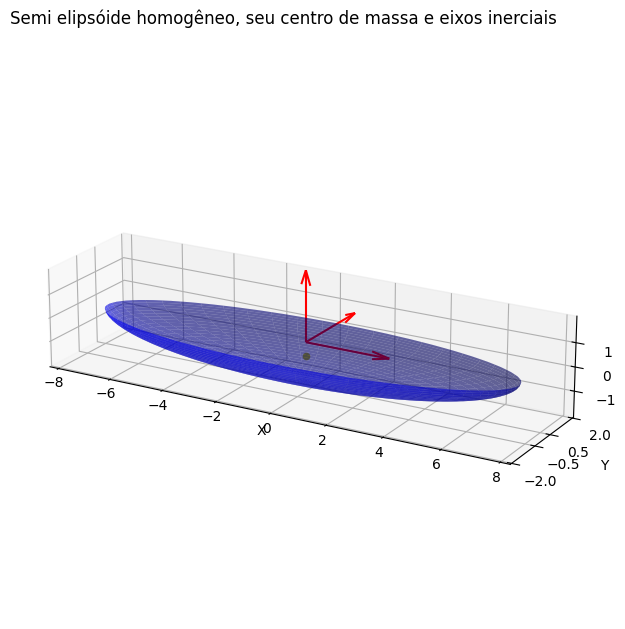

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Criação dos pontos para o elipsoide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)

x = b1 * np.outer(np.cos(u), np.sin(v))
y = b2 * np.outer(np.sin(u), np.sin(v))
z = b3 * np.outer(np.ones_like(u), np.cos(v))


# Filtrar para apenas a metade inferior do elipsoide
z_mask = z > 0
x[z_mask] = np.nan
y[z_mask] = np.nan
z[z_mask] = np.nan

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotar a metade do elipsoide 
ax.plot_surface(x, y, z, color='b', alpha=0.6)

# Ajustar as proporções dos eixos
ax.set_box_aspect([b1, b2, b3])

# Remover os indicadores dos números nos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#Remover marcação dos eixos
ax.set_yticks([-2,-0.5,0.5,2])
ax.set_zticks([-1,0,1])
ax.axes.set_xlim3d(left=-8, right=8) 
ax.axes.set_ylim3d(bottom=-2, top=2) 
ax.axes.set_zlim3d(bottom=-2, top=2) 


# Ajustar a perspectiva 
ax.view_init(elev=20, azim=-50)

    #centro de massa e eixos do elipsoide homogeneo:
cm = [0,0,-(3/8)*b3]
ax.view_init(20,-60,0)
ax.scatter(*cm,color='y')

ax.quiver(0,0,0,[b1,0,0],[0,b2,0],[0,0,b3], length=3, normalize=True, arrow_length_ratio=0.21,color='r')
fig.suptitle("Semi elipsóide homogêneo, seu centro de massa e eixos inerciais ")
# Mostrar a figura
plt.show()


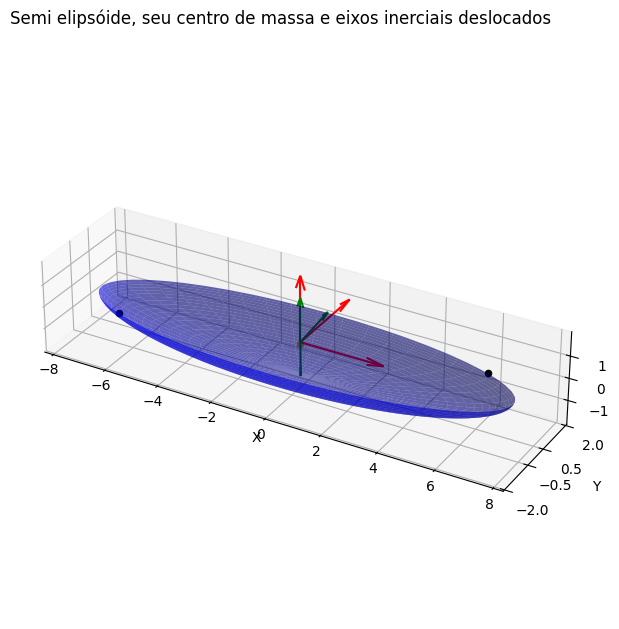

In [9]:


cm = [0,0,-(3/8)*(me*b3)/(2*mp*me)]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotar a metade do elipsoide para (z <= 0)
ax.plot_surface(x, y, z, color='b', alpha=0.6)

# Ajustar as proporções dos eixos
ax.set_box_aspect([b1, b2, b3])

# Remover os indicadores dos números nos eixos
ax.set_box_aspect([b1, b2, b3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#Remover marcação dos eixos
ax.set_yticks([-2,-0.5,0.5,2])
ax.set_zticks([-1,0,1])
ax.axes.set_xlim3d(left=-8, right=8) 
ax.axes.set_ylim3d(bottom=-2, top=2) 
ax.axes.set_zlim3d(bottom=-2, top=2) 

ax.scatter(*cm,color='y')
ax.scatter(*r0,color='k')
ax.scatter(-1*r0[0],-1*r0[1],color='k')
ax.quiver(0,0,0,[b1,0,0],[0,b2,0],[0,0,b3], length=3, normalize=True, arrow_length_ratio=0.21,color='r')
ax.quiver(0,0,0,I[0],I[1],I[2], length=2, normalize=True, arrow_length_ratio=0.21,color='g')

fig.suptitle("Semi elipsóide, seu centro de massa e eixos inerciais deslocados")
# Mostrar a figura
plt.show()

In [15]:

# Matriz de rotação em torno do eixo z
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Aplicar rotação
xyz = np.vstack([x.flatten(), y.flatten(), z.flatten()])
xyz_rotated = R @ xyz
x_rot = xyz_rotated[0, :].reshape(x.shape)
y_rot = xyz_rotated[1, :].reshape(y.shape)
z_rot = xyz_rotated[2, :].reshape(z.shape)


In [ ]:


cm = [0,0,-(3/8)*(me*b3)/(2*mp*me)]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Matriz de rotação em torno do eixo z
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Aplicar rotação
xyz = np.vstack([x.flatten(), y.flatten(), z.flatten()])
xyz_rotated = R @ xyz
x_rot = xyz_rotated[0, :].reshape(x.shape)
y_rot = xyz_rotated[1, :].reshape(y.shape)
z_rot = xyz_rotated[2, :].reshape(z.shape)


# Plotar a metade do elipsoide para (z <= 0)
ax.plot_surface(x, y_rot, z_rot, color='b', alpha=0.6)
ax.plot_surface(x, y, z, color='g', alpha=0.6)
# Remover os indicadores dos números nos eixos
ax.set_box_aspect([b1, b1, b3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#Remover marcação dos eixos
# ax.set_yticks([-2,-0.5,0.5,2])
ax.set_zticks([-1,0,1])
ax.axes.set_xlim3d(left=-b1, right=b1) 
ax.axes.set_ylim3d(bottom=-b1, top=b1) 
ax.axes.set_zlim3d(bottom=-b3, top=0) 

# ax.scatter(*cm,color='y')
# ax.scatter(*r0,color='k')
# ax.scatter(-1*r0[0],-1*r0[1],color='k')
# ax.quiver(0,0,0,[b1,0,0],[0,b2,0],[0,0,b3], length=3, normalize=True, arrow_length_ratio=0.21,color='r')
# ax.quiver(0,0,0,I[0],I[1],I[2], length=2, normalize=True, arrow_length_ratio=0.21,color='g')

fig.suptitle("Semi elipsóide, seu centro de massa e eixos inerciais deslocados")
# Mostrar a figura
plt.show()

: 

: 

: 